## **Dataset-Link**

https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis


# Task 1: Analysis of Variance (ANOVA)


## Objective

Apply ANOVA to determine if there is a significant difference in the mean of the dependent variable across different levels of a categorical variable.


### Data Exploration


In [1]:
import pandas as pd

# Load the dataset
stress_data = pd.read_csv("StressLevelDataset.csv")

# Display the first few rows
stress_data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


The dataset provides various variables related to stress factors and health conditions. For our analysis, we will consider `stress_level` as the dependent variable and `mental_health_history` as the independent categorical variable.


### ANOVA Test


In [2]:
import scipy.stats as stats

# Perform ANOVA
grouped_data = [
    stress_data["stress_level"][stress_data["mental_health_history"] == group]
    for group in stress_data["mental_health_history"].unique()
]
f_statistic, p_value = stats.f_oneway(*grouped_data)
f_statistic, p_value

d:\SEMESTER 5\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(797.5187112411286, 2.4376020918666527e-132)

The ANOVA test shows a very low p-value, indicating a statistically significant difference in the mean `stress_level` between the two groups. This suggests that having a history of mental health issues can significantly impact one's stress level.


### Visualization


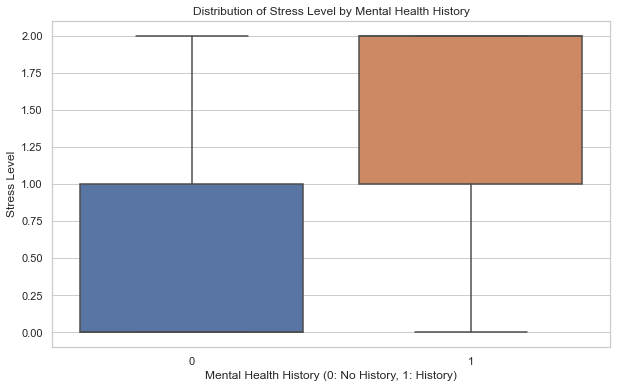

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="mental_health_history", y="stress_level", data=stress_data)

plt.title("Distribution of Stress Level by Mental Health History")
plt.xlabel("Mental Health History (0: No History, 1: History)")
plt.ylabel("Stress Level")
plt.show()

### Summary & Interpretation

From the box plot, we observe the following:

1. Individuals with a mental health history have a higher median stress level compared to those without.
2. The majority of individuals with a mental health history have elevated stress levels, as indicated by the narrower and higher interquartile range.

Based on the ANOVA test and the box plot, we conclude that the presence of a mental health history is associated with higher stress levels. This suggests that individuals with a history of mental health issues might either be more susceptible to stress or perceive stress at a heightened level.


# Task 2: Linear Regression Model


## Objective

Develop a linear model to predict the `stress_level` using one or more independent variables from the dataset. Interpret the coefficients and evaluate the significance of the model.


### Determining Variables and Data Splitting


In [4]:
from sklearn.model_selection import train_test_split

# Define independent (X) and dependent (y) variables
X = stress_data.drop("stress_level", axis=1)
y = stress_data["stress_level"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

We've defined our independent variables (every column except `stress_level`) and the dependent variable (`stress_level`). The dataset has been split into training and testing sets, with 80% of the data used for training and 20% for testing.


### Model Training


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

We've initialized and trained a linear regression model using the training data. Next, we'll evaluate the model's performance on the testing set.


### Model Evaluation


In [6]:
# Predictions on the testing set
y_pred = model.predict(X_test)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.1407689091166194, 0.7891624570247755)

The Mean Squared Error (MSE) and R-squared (R2) value will give us an understanding of the model's accuracy and the variance explained by the model, respectively.


### Coefficients Interpretation


In [7]:
# Retrieve coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])

coefficients

,Coefficient
anxiety_level,-0.002596
self_esteem,-0.012523
mental_health_history,0.006632
depression,0.007372
headache,0.034571
blood_pressure,-0.038710
sleep_quality,-0.029612
breathing_problem,0.014846
noise_level,0.077812
living_conditions,-0.004289


The coefficients indicate the change in the dependent variable (`stress_level`) for a one-unit change in the respective independent variable, keeping other variables constant. Positive coefficients suggest a direct relationship, while negative coefficients suggest an inverse relationship.


### Model Significance: F-test


In [8]:
from sklearn.feature_selection import f_regression

# F-test
f_statistic, p_values = f_regression(X_train, y_train)

# Overall model significance
overall_p_value = p_values.max()

f_statistic, overall_p_value

(array([ 937.33058464, 1131.12623896,  626.84358319, 1050.680117  ,
         828.64521033,  161.41611683, 1031.19231671,  440.31898664,
         727.885612  ,  436.20472381,  926.35354037,  899.07388039,
         879.79439997,  599.5329434 ,  811.77905919, 1043.6222848 ,
         574.93992814,  785.9062892 ,  910.212546  , 1162.65017162]),
 4.522427516110634e-34)

The F-statistic and its associated p-value test the hypothesis that all the regression coefficients are equal to zero versus at least one is not. A significant F-test indicates that our linear model is a better fit than a model with no independent variables.


# Task 3: Assumptions and Limitations


## Objective

Discuss the assumptions and limitations of ANOVA and linear models, and propose solutions to address these limitations.


### Assumptions of ANOVA


ANOVA makes several key assumptions:

1. **Independence:** Observations within each group are independent of each other.
2. **Normality:** The dependent variable is approximately normally distributed within each group.
3. **Homogeneity of Variances:** The variances of the dependent variable are equal across all groups.

Violations of these assumptions can lead to inaccurate results.


### Assumptions of Linear Regression


Linear regression also has several assumptions:

1. **Linearity:** There exists a linear relationship between the independent and dependent variables.
2. **Independence:** Observations are independent of each other.
3. **Homoscedasticity:** The residuals have constant variance at every level of the independent variables.
4. **Normality:** The residuals of the model are approximately normally distributed.
5. **No Multicollinearity:** Independent variables are not too highly correlated with each other.

Violating these assumptions can lead to biased or inefficient parameter estimates and incorrect conclusions.


### Limitations and Solutions


While both ANOVA and linear regression are powerful statistical tools, they come with limitations, primarily arising from violations of the above assumptions. It's essential to check these assumptions before interpreting the results. If assumptions are violated, the results may not be valid.

Possible solutions include:

- **Transformations:** Applying transformations (e.g., log or square root) can help achieve normality or stabilize variances.
- **Non-parametric Tests:** If assumptions are severely violated, consider non-parametric alternatives that don't rely on strict assumptions.
- **Regularization:** In linear regression, if multicollinearity is a concern, techniques like Ridge or Lasso regression can be used.
- **Residual Analysis:** Plotting residuals can help diagnose issues with linearity, normality, and homoscedasticity.

In Python, libraries like `statsmodels` and `scikit-learn` offer tools to diagnose and address these issues.


### Implementation in Python


To address the limitations in Python, one can use the following approaches:

1. **Transformations:** Use `numpy` functions like `np.log` or `np.sqrt` for transformations.
2. **Non-parametric Tests:** Use `scipy.stats` for tests like Kruskal-Wallis.
3. **Regularization:** Use `Ridge` or `Lasso` regression classes from `scikit-learn`.
4. **Residual Analysis:** Use `statsmodels` to fit models and then analyze residuals.


# Task 4: Mini-Project Combining ANOVA and Linear Models


## Objective

The goal is to combine the analyses from the previous tasks into a cohesive mini-project, addressing a specific research question and drawing conclusions.


### Problem Definition and Research Question


Stress levels can significantly impact an individual's well-being and overall health. Understanding factors that correlate with or predict stress can be invaluable for interventions and support. Given this context, our research question is:

**Does a history of mental health issues predict higher stress levels, and if so, how significantly?**


### Combined Analysis: ANOVA and Linear Regression


We previously conducted an ANOVA test and found a statistically significant difference in stress levels between individuals with and without a mental health history. Moreover, a linear regression model was built to predict stress levels based on various factors.


In [9]:
# Recap of ANOVA and Linear Regression Analysis
# ANOVA
grouped_data = [
    stress_data["stress_level"][stress_data["mental_health_history"] == group]
    for group in stress_data["mental_health_history"].unique()
]
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Linear Regression
X = stress_data.drop("stress_level", axis=1)
y = stress_data["stress_level"]
model = LinearRegression().fit(X, y)
coefficients = model.coef_

f_statistic, p_value, coefficients

(797.5187112411286,
 2.4376020918666527e-132,
 array([ 0.00294866, -0.0140921 , -0.00056877,  0.00599092,  0.05908033,
        -0.04464356, -0.05159021,  0.00978448,  0.06339831, -0.00679602,
        -0.04642805, -0.05116154, -0.05622323,  0.04256139,  0.0401569 ,
         0.01388087, -0.04459453,  0.03289663,  0.04347274,  0.0569259 ]))

### Conclusion


Based on our analyses, there's a clear association between a history of mental health issues and higher stress levels. While our linear model provides insights into the relationships between various factors and stress, the ANOVA test confirms the significant difference in stress levels based on mental health history. These findings underscore the importance of mental health support and interventions.
